In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 映画レビューのデータセットを使って

### 1.映画数の年推移
### 2. revenueの年推移をplotする

In [2]:
#1.映画数の年推移
#横軸: 年（year）
#縦軸: 映画数(count)

#CSVファイル読み込み
df = pd.read_csv('dataset/tmdb_5000_movies.csv')

In [3]:
#release_dateにNaNの入っているデータは消す
#NaNがあると文字列操作できない
df = df[~df['release_date'].isna()]

In [4]:
#release_dateから年（最初の４文字）を取り出し、新しいカラムyearに入れる
#こんな↓関数を作ったけど、1行で書けるのでlambda関数にする
#def get_year(release_date):
#    return release_date[:4]

#全行にapplyする
#plotの横軸に数値項目として表示するため、lambda関数の戻り値はintにする(文字列だと全年が表示される)
df['year'] = df['release_date'].apply(lambda x: int(x[:4]))

In [5]:
#年ごとに映画数を取得する
#年ごと->'year'に対してgroupby
#その年をカウントする
#それぞれのカラムに対して実行されるので、何か1つ取り出す
#->各yearのレコード数が取得できる
df.groupby('year').count()['id']

year
1916      1
1925      1
1927      1
1929      2
1930      1
       ... 
2013    231
2014    238
2015    216
2016    104
2017      1
Name: id, Length: 90, dtype: int64

Text(0, 0.5, 'count')

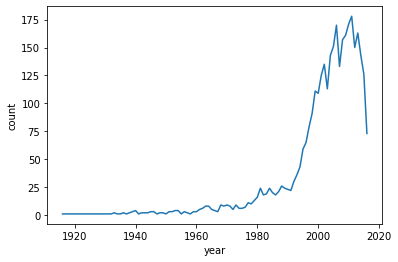

In [15]:
#グラフの描画
plt.plot(df.groupby('year').count()['id'])
plt.xlabel('year')
plt.ylabel('count')

In [16]:
#revenueが０のデータは省く
df = df[df['revenue'] != 0]

In [17]:
#yearでgroupbyして、各年のrevenueの中央値、平均、最大値を見る
df.groupby('year').median()['revenue']

year
1916      8394751.0
1925     22000000.0
1927       650422.0
1929      4358000.0
1930      8000000.0
           ...     
2012     64793040.0
2013     63464861.0
2014     80383290.0
2015     84769058.0
2016    108286421.0
Name: revenue, Length: 89, dtype: float64

Text(0.5, 0, 'year')

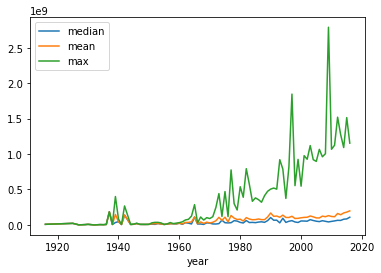

In [18]:
#グラフの描画（線が複数あるので、凡例もつける）
plt.plot(df.groupby('year').median()['revenue'], label='median')
plt.plot(df.groupby('year').mean()['revenue'], label='mean')
plt.plot(df.groupby('year')['revenue'].max(), label='max')
plt.legend()
plt.xlabel('year')

## 複数のグラフ（図）を描画する

### 1.plt.subplot()を使う
### 2-1.plt.figure()を使う(オブジェクト指向)
### 2-2.plt.subplots()を使う(オブジェクト指向)

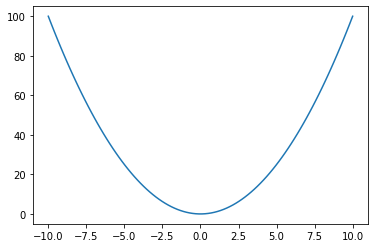

In [30]:
#1. plt.subplot()
x = np.linspace(-10, 10, 100)
plt.plot(x, x**2)

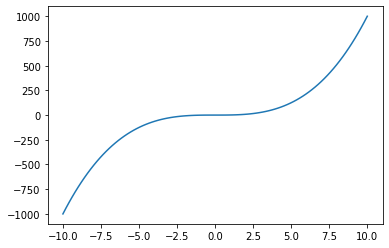

In [31]:
plt.plot(x, x**3)

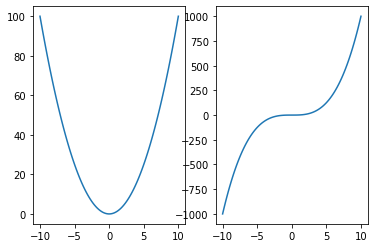

In [32]:
#上記を横に並べる
plt.subplot(1, 2, 1) #1行、２列、１番目
plt.plot(x, x**2)

plt.subplot(1, 2, 2) #1行、２列、2番目
plt.plot(x, x**3)

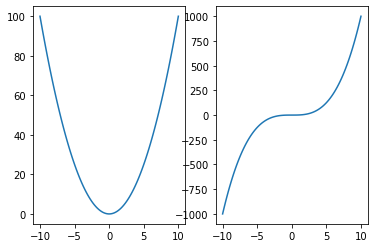

In [35]:
#2-1.plt.figure() オブジェクト指向
fig = plt.figure() #figureオブジェクトのfigインスタンスを生成
ax1 = fig.add_subplot(1, 2, 1) #add_subplot()でaxisのオブジェクトができる 1行、２列、１番目
ax2 = fig.add_subplot(1, 2, 2) #1行、２列、2番目

ax1.plot(x, x**2) #axisのオブジェクトに対してplot()を呼ぶ
ax2.plot(x, x**3)

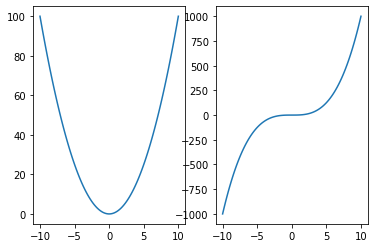

In [54]:
#2-2.plt.subplots()
#figureオブジェクトとaxisオブジェクトを同時に作る
#nrows, ncolsは省略可
fig, axes = plt.subplots(nrows=1, ncols=2) #1行、２列

#axesはNumPyのArray。それぞれにplotを作る
axes[0].plot(x, x**2)
axes[1].plot(x, x**3)

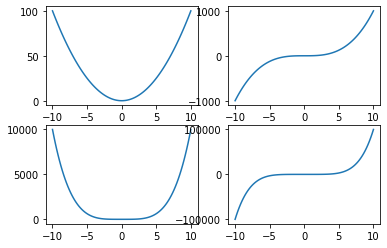

In [60]:
#多次元の場合
fig, axes = plt.subplots(nrows=2, ncols=2) 
axes[0, 0].plot(x, x**2) #左上
axes[0, 1].plot(x, x**3) #右上
axes[1, 0].plot(x, x**4) #左下
axes[1, 1].plot(x, x**5) #右下

In [57]:
#axesの中身
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x404f0ae910>,
      dtype=object)

In [44]:
#shpageの確認
axes.shape

(2, 2)

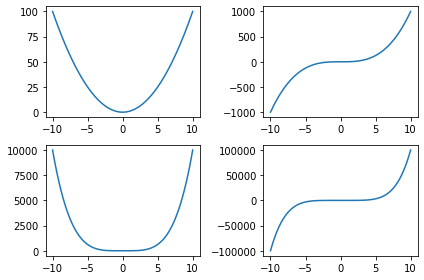

In [62]:
#多次元の場合
fig, axes = plt.subplots(nrows=2, ncols=2) 
axes[0, 0].plot(x, x**2) #左上
axes[0, 1].plot(x, x**3) #右上
axes[1, 0].plot(x, x**4) #左下
axes[1, 1].plot(x, x**5) #右下

#ラベルが被らないようにする(figure全体の処理になるので、figインスタンスに対して使う)
fig.tight_layout()

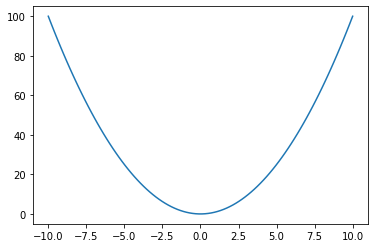

In [68]:
#1つの時にも使用可
#.subplotsのデフォルトは1,1なので、subplots()でもsubplots(1,1)でもOK
#axesはNumPyのArrayではなく、そのままaxesのオブジェクトが返ってくる
#(よって、axes[0,0]という書き方はエラーになる)
fig, axes = plt.subplots()
axes.plot(x, x**2) 

In [67]:
axes

(-11.0, 11.0, -1100.0, 1100.0)

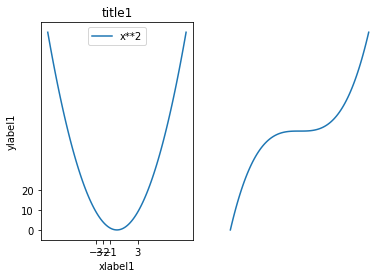

In [76]:
#付属情報をつける
fig, axes = plt.subplots(nrows=1, ncols=2) #1行、２列
axes[0].plot(x, x**2, label='x**2')
axes[1].plot(x, x**3)

axes[0].set_xlabel('xlabel1')
axes[0].set_ylabel('ylabel1')
axes[0].set_title('title1')
axes[0].set_xticks([-3, -2, -1, 3])
axes[0].set_yticks([0, 10, 20])
axes[0].legend()
axes[1].axis('off') #軸を消す